In [103]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import numpy as np
import math
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

df=pd.read_csv("/home/vipin/sem-7/BTP/BTP Data-001/BTP Data/Rainfall Data/7Palakkad-Alathur_monthly.csv")

In [104]:
df

,Year,Month,RF
0,1976,1,0.0
1,1976,2,0.0
2,1976,3,0.0
3,1976,4,200.0
4,1976,5,52.0
...,...,...,...
427,2011,8,405.1
428,2011,9,244.7
429,2011,10,177.1
430,2011,11,222.9


In [105]:
x = min(df.RF)
y = max(df.RF)
L1 = 0.10
L2 = 1.00
U = (x-L1,y+L2)
M = (U[1]+U[0])/2

In [106]:
U

(-0.1, 890.5)

In [107]:
M

445.2

In [108]:
a = (df.RF - U[0])/(M - U[0])
b = (U[1] - df.RF)/(U[1] - M)

In [109]:
df['a'] = a
df['b'] = b

In [134]:
#dom = df[['a','b']].min(axis=1)
dom = (df.RF - U[0])/(U[1] - U[0])

In [135]:
dom

0      0.000112
1      0.000112
2      0.000112
3      0.224680
4      0.058500
         ...   
427    0.454974
428    0.274871
429    0.198967
430    0.250393
431    0.019987
Name: RF, Length: 432, dtype: float64

In [201]:
lag = 5
DOM = list(dom)
y = np.array(dom.shift(lag, axis = 0).dropna())

In [202]:
y

array([1.12283854e-04, 1.12283854e-04, 1.12283854e-04, 2.24679991e-01,
       5.84998877e-02, 1.46642713e-01, 4.99550865e-01, 9.94834943e-02,
       8.99393667e-02, 2.80709634e-01, 1.98742421e-01, 7.97215360e-03,
       1.12283854e-04, 4.60363800e-03, 1.23512239e-03, 6.01841455e-02,
       1.31484393e-01, 4.54861891e-01, 5.71637099e-01, 3.09454300e-01,
       1.03974848e-01, 4.11295756e-01, 4.85178531e-01, 1.12283854e-04,
       1.12283854e-04, 1.07792499e-02, 1.12283854e-04, 3.82887941e-02,
       9.89220750e-02, 4.86862789e-01, 6.54727150e-01, 4.61598922e-01,
       1.47091848e-02, 2.91488884e-01, 1.65169549e-01, 1.07792499e-02,
       1.12283854e-04, 1.92005390e-02, 1.23512239e-03, 2.35796093e-02,
       8.37637548e-02, 4.31843701e-01, 6.24073658e-01, 4.66202560e-01,
       1.32607231e-01, 1.15427801e-01, 3.57174938e-01, 1.12283854e-04,
       1.12283854e-04, 1.12283854e-04, 6.07455648e-02, 3.43588592e-02,
       1.61801033e-01, 7.23220301e-01, 7.55782618e-01, 3.84684482e-01,
      

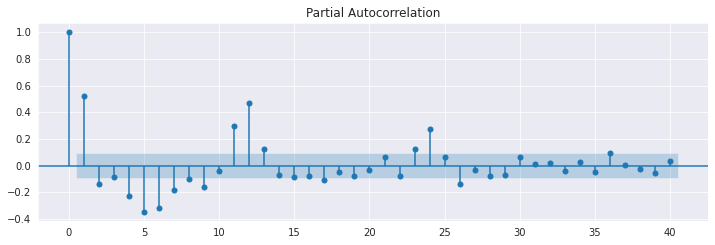

In [203]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dom, lags=40, ax=ax2)

In [204]:
XX = np.zeros((len(DOM)-lag+1,lag))
for i in range(len(DOM)-lag+1):
    XX[i] = DOM[i:i+lag]

In [205]:
XX.shape

(428, 5)

In [206]:
y.shape

(427,)

In [207]:
splt = int(XX.shape[0]*0.78)
splt

333

In [211]:
X_tr = XX[:splt][:]
X_tst = XX[splt:][:]

y_tr = y[:splt]
y_tst = y[splt:]

In [212]:
X_tr.shape

(333, 5)

In [213]:
X_tst = X_tst[:X_tst.shape[0]-1][:]

In [214]:
y_tr.shape

(333,)

In [215]:
from keras.models import Sequential
from keras.layers import Dense

In [216]:
model = Sequential()
model.add(Dense(8, input_dim=lag, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [217]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [218]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_13 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [219]:
history = model.fit(X_tr, y_tr, epochs=200, batch_size=10)

Epoch 1/200
34/34 [==============================] - 0s 644us/step - loss: 0.1211 - mse: 0.1211 - mae: 0.3137
Epoch 2/200
34/34 [==============================] - 0s 513us/step - loss: 0.0773 - mse: 0.0773 - mae: 0.2467
Epoch 3/200
34/34 [==============================] - 0s 474us/step - loss: 0.0510 - mse: 0.0510 - mae: 0.1912
Epoch 4/200
34/34 [==============================] - 0s 462us/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1590
Epoch 5/200
34/34 [==============================] - 0s 486us/step - loss: 0.0271 - mse: 0.0271 - mae: 0.1312
Epoch 6/200
34/34 [==============================] - 0s 474us/step - loss: 0.0163 - mse: 0.0163 - mae: 0.1000
Epoch 7/200
34/34 [==============================] - 0s 489us/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0762
Epoch 8/200
34/34 [==============================] - 0s 487us/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0602
Epoch 9/200
34/34 [==============================] - 0s 465us/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0498
Epoch 10/2

34/34 [==============================] - 0s 478us/step - loss: 1.1792e-04 - mse: 1.1792e-04 - mae: 0.0079
Epoch 72/200
34/34 [==============================] - 0s 466us/step - loss: 1.1089e-04 - mse: 1.1089e-04 - mae: 0.0076
Epoch 73/200
34/34 [==============================] - 0s 459us/step - loss: 1.2475e-04 - mse: 1.2475e-04 - mae: 0.0085
Epoch 74/200
34/34 [==============================] - 0s 464us/step - loss: 1.1300e-04 - mse: 1.1300e-04 - mae: 0.0079
Epoch 75/200
34/34 [==============================] - 0s 467us/step - loss: 1.0922e-04 - mse: 1.0922e-04 - mae: 0.0077
Epoch 76/200
34/34 [==============================] - 0s 490us/step - loss: 1.0413e-04 - mse: 1.0413e-04 - mae: 0.0074
Epoch 77/200
34/34 [==============================] - 0s 485us/step - loss: 1.0139e-04 - mse: 1.0139e-04 - mae: 0.0073
Epoch 78/200
34/34 [==============================] - 0s 487us/step - loss: 1.0570e-04 - mse: 1.0570e-04 - mae: 0.0076
Epoch 79/200
34/34 [==============================] - 0s 497u

34/34 [==============================] - 0s 496us/step - loss: 5.3128e-05 - mse: 5.3128e-05 - mae: 0.0052
Epoch 140/200
34/34 [==============================] - 0s 492us/step - loss: 6.2010e-05 - mse: 6.2010e-05 - mae: 0.0059
Epoch 141/200
34/34 [==============================] - 0s 516us/step - loss: 5.5991e-05 - mse: 5.5991e-05 - mae: 0.0055
Epoch 142/200
34/34 [==============================] - 0s 475us/step - loss: 5.3845e-05 - mse: 5.3845e-05 - mae: 0.0053
Epoch 143/200
34/34 [==============================] - 0s 473us/step - loss: 5.3004e-05 - mse: 5.3004e-05 - mae: 0.0055
Epoch 144/200
34/34 [==============================] - 0s 489us/step - loss: 5.5448e-05 - mse: 5.5448e-05 - mae: 0.0055
Epoch 145/200
34/34 [==============================] - 0s 497us/step - loss: 7.1954e-05 - mse: 7.1954e-05 - mae: 0.0066
Epoch 146/200
34/34 [==============================] - 0s 481us/step - loss: 7.9778e-05 - mse: 7.9778e-05 - mae: 0.0069
Epoch 147/200
34/34 [==============================] -

dict_keys(['loss', 'mse', 'mae'])


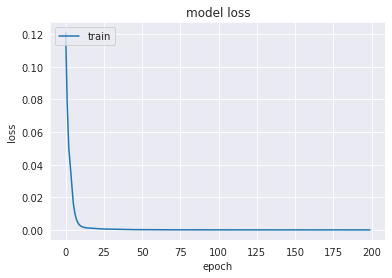

In [220]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [153]:
#F = 1

In [221]:
y_new = model.predict(X_tst)
y_old = model.predict(X_tr)

In [222]:
rf_tst = y_new*(U[1] - U[0]) + U[0]
rf_tr = y_old*(U[1] - U[0]) + U[0]

In [223]:
rf_tr.shape[0]

333

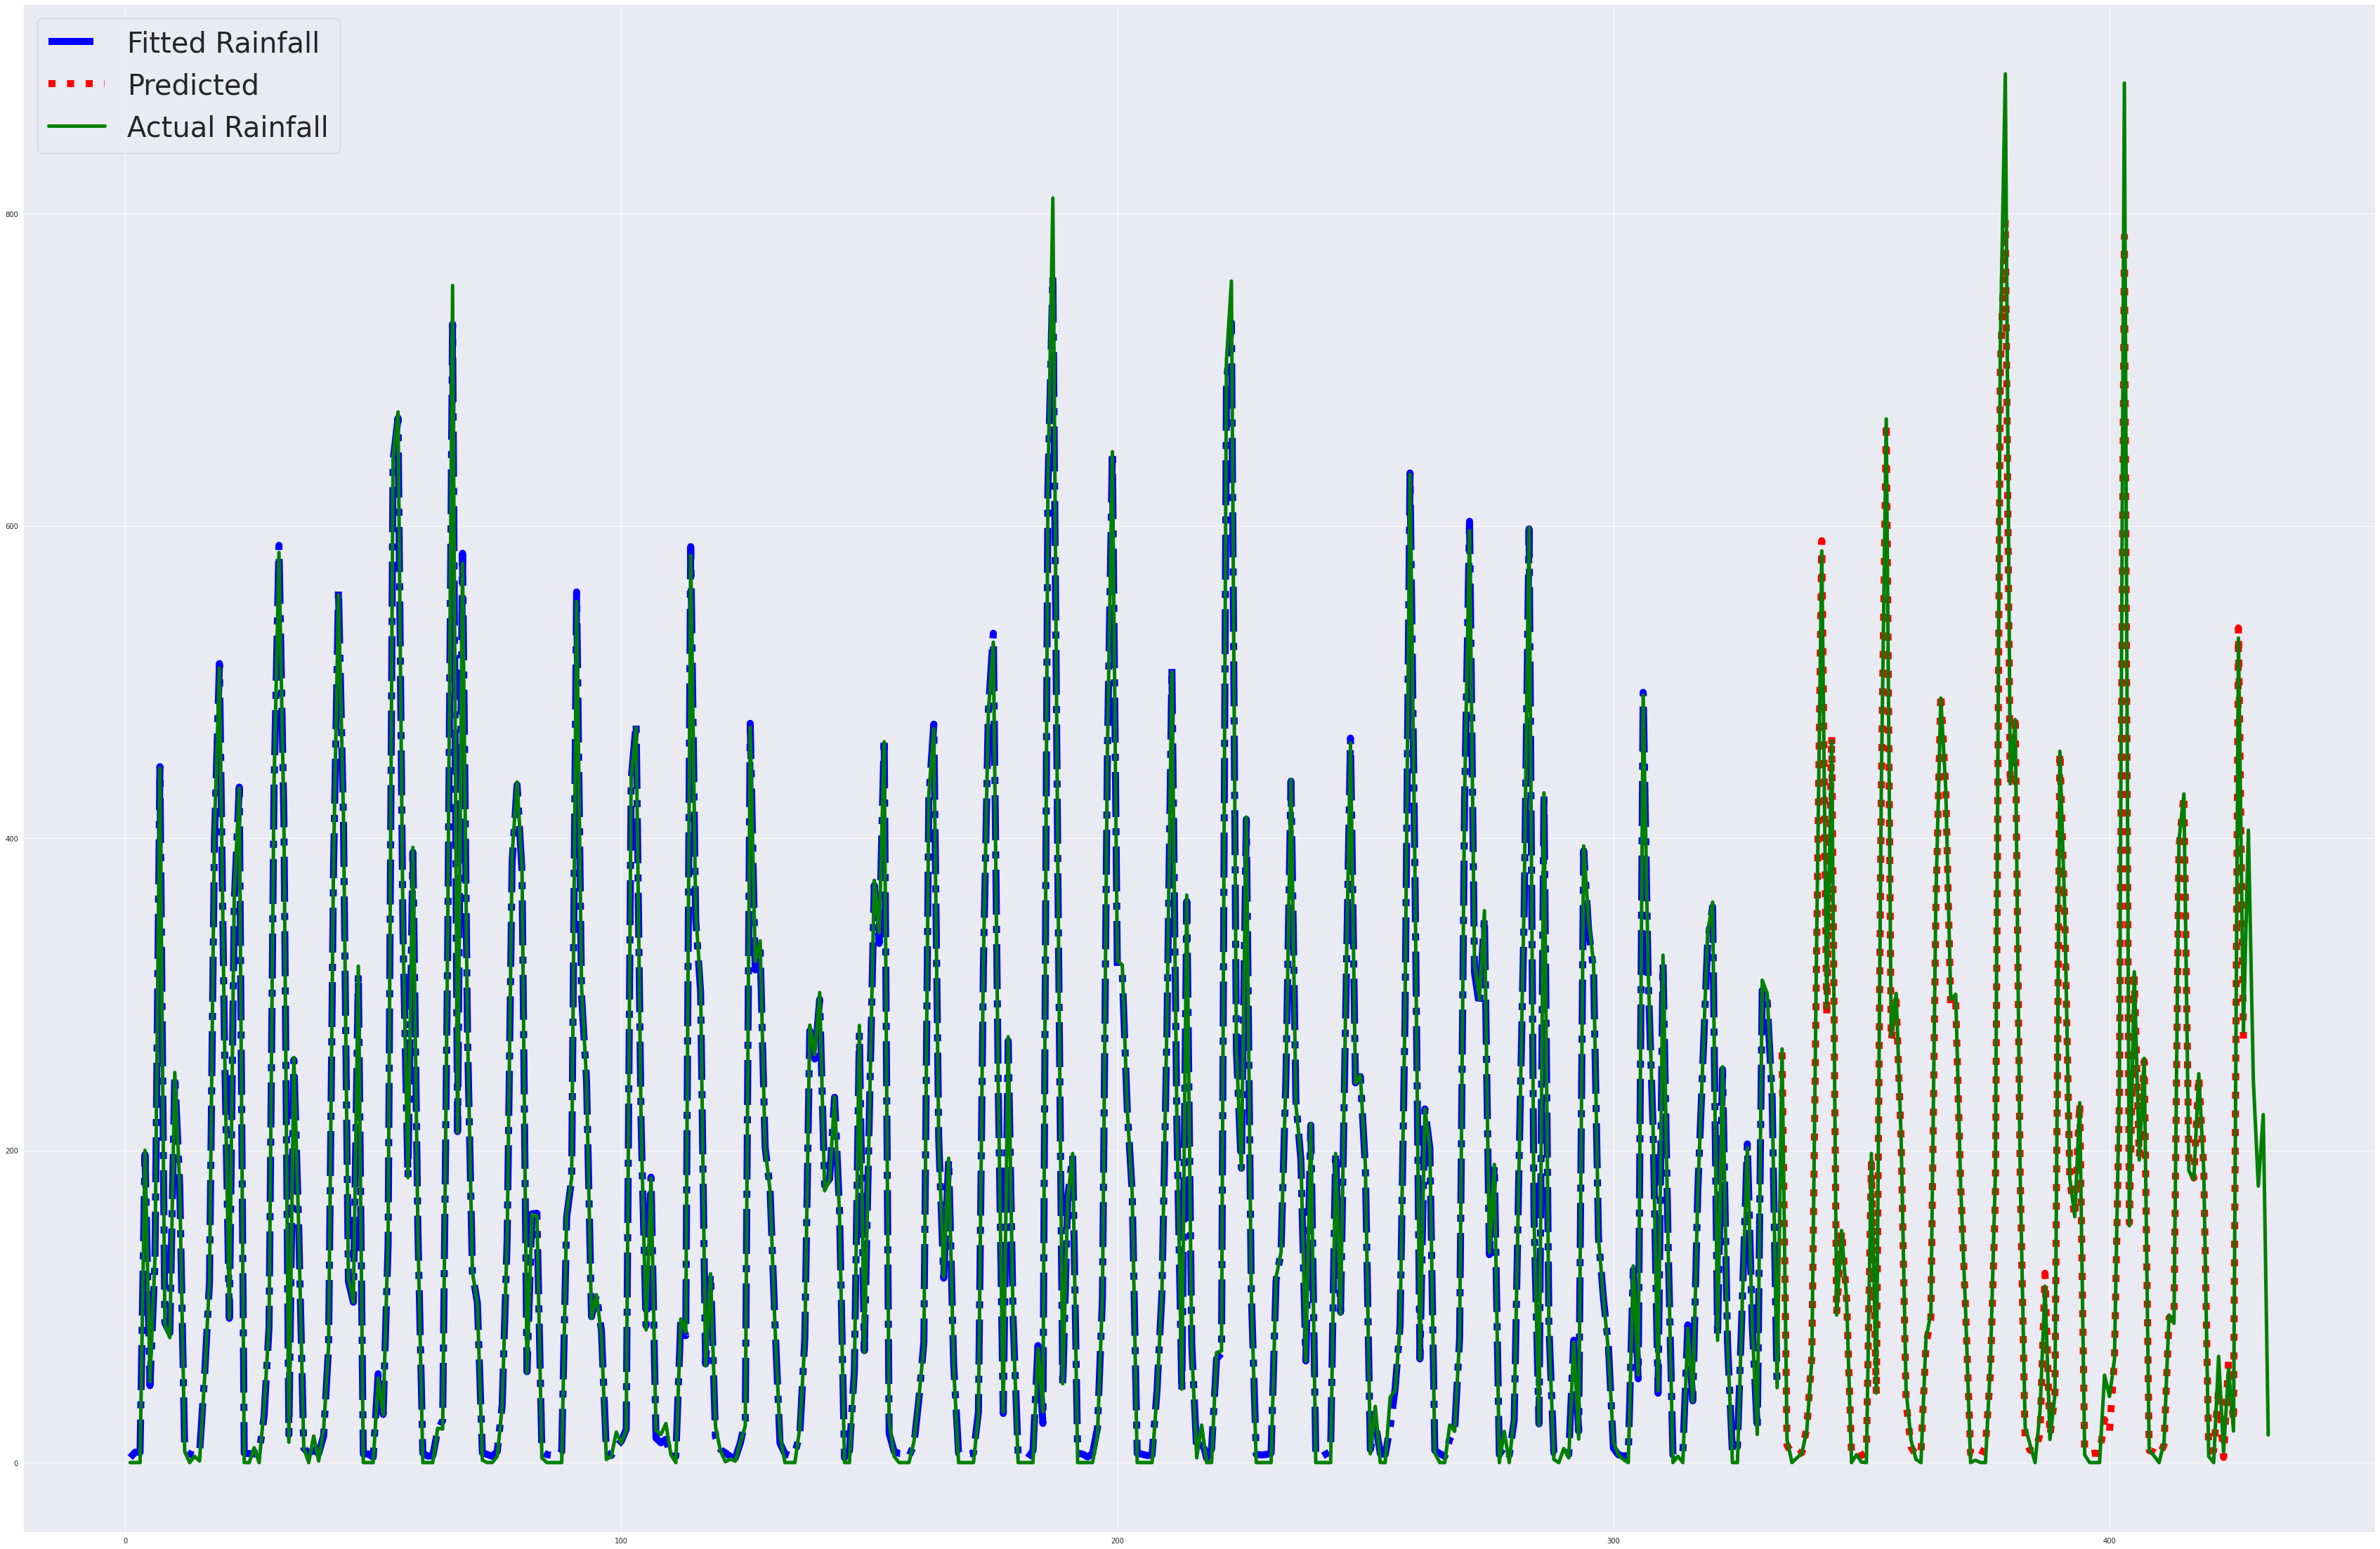

In [224]:
import matplotlib.pyplot as plt
x_l = list(range(1,430))
plt.figure(figsize=(60, 40))
plt.plot(list(range(1,rf_tr.shape[0]+1)), rf_tr, 'b', linestyle='-.',linewidth='10',label = 'Fitted Rainfall')
plt.plot(list(range(rf_tr.shape[0]+1,433-lag)), rf_tst, 'r',linestyle=':',linewidth='10',label = 'Predicted')
plt.plot(list(range(1,433)), df.RF, 'g',linestyle='-',linewidth='5',label = 'Actual Rainfall')
plt.legend(loc='best',prop={'size': 40})
plt.show()

In [226]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(df.RF[:333], rf_tr, squared=False)
rms

5.350132128053571

In [227]:
A = rf_tr.tolist()
A = [i[0] for i in A]

import scipy.stats
scipy.stats.pearsonr(A, list(df.RF[:333]))    # Pearson's r

(0.9996387168495634, 0.0)

In [160]:
for x in XX:
    print(x)

[0.00011228 0.00011228 0.00011228]
[1.12283854e-04 1.12283854e-04 2.24679991e-01]
[1.12283854e-04 2.24679991e-01 5.84998877e-02]
[0.22467999 0.05849989 0.14664271]
[0.05849989 0.14664271 0.49955086]
[0.14664271 0.49955086 0.09948349]
[0.49955086 0.09948349 0.08993937]
[0.09948349 0.08993937 0.28070963]
[0.08993937 0.28070963 0.19874242]
[0.28070963 0.19874242 0.00797215]
[1.98742421e-01 7.97215360e-03 1.12283854e-04]
[0.00797215 0.00011228 0.00460364]
[0.00011228 0.00460364 0.00123512]
[0.00460364 0.00123512 0.06018415]
[0.00123512 0.06018415 0.13148439]
[0.06018415 0.13148439 0.45486189]
[0.13148439 0.45486189 0.5716371 ]
[0.45486189 0.5716371  0.3094543 ]
[0.5716371  0.3094543  0.10397485]
[0.3094543  0.10397485 0.41129576]
[0.10397485 0.41129576 0.48517853]
[4.11295756e-01 4.85178531e-01 1.12283854e-04]
[4.85178531e-01 1.12283854e-04 1.12283854e-04]
[0.00011228 0.00011228 0.01077925]
[0.00011228 0.01077925 0.00011228]
[0.01077925 0.00011228 0.03828879]
[0.00011228 0.03828879 0.09892

In [ ]:
#F= 10

In [228]:
xc = X_tr[-1]

In [229]:
xc = np.reshape(xc , (1,lag))

In [230]:
t1=model.predict(xc)

In [231]:
t1[0][0]

0.0529761

In [232]:
YY = []
for i in range(10):
    t1 = model.predict(xc)
    xc[0][0] = xc[0][1]
    xc[0][1] = xc[0][2]
    xc[0][0] = t1[0][0]
    YY.append(t1[0][0])

In [233]:
YY = np.array(YY)

In [234]:
Y_x = y_tst[:9]

In [235]:
Y_x = np.insert(Y_x, 0, y_tr[-1], axis=0)

In [236]:
t_tst = YY*(U[1] - U[0]) + U[0]
t_ori = Y_x*(U[1] - U[0]) + U[0]

In [237]:
t_tst

array([47.080517, 43.491993, 38.28579 , 31.209093, 23.56265 , 17.30512 ,
       13.417442, 11.446861, 10.559166, 10.181581], dtype=float32)

In [238]:
t_ori

array([ 48. , 265. ,  14.5,   0. ,   3. ,   6. ,  21. ,  66. , 342. ,
       584. ])

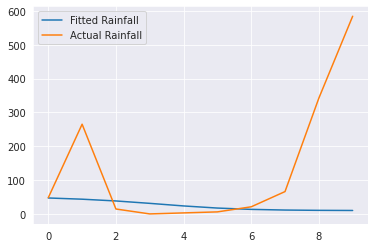

In [239]:
plt.plot(t_tst,label = 'Fitted Rainfall')
plt.plot(t_ori,label = 'Actual Rainfall')
plt.legend(loc='best')


In [ ]:
###archives

sns.lineplot(x="Year", y="RF",legend = 'full' , data=df2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['RF'], model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)
    
    
    
    
    
test_stationarity(df2['RF'])   

In [ ]:
first_diff = df2.RF - df2.RF.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

In [ ]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dom_tr, lags=40, ax=ax2)

In [ ]:
model2 = sm.tsa.ARIMA(df2.RF, order=(14, 1, 0)).fit(disp = 1)

fitted_dom = model2.fittedvalues

import matplotlib.pyplot as plt
plt.plot(first_diff , 'r')
plt.plot(fitted_dom , 'b')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(df.RF[:339], fitted_dom, squared=False)
rms

In [ ]:
forecast = model2.forecast(steps=95)[0]

In [ ]:
history = [x for x in df2.RF]
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1